# **Project title:- Seoul Bike sharing demand prediction**

## **Project Description**

### Currently Rental bikes are introduced in many rental cities for the enhancement of mobility comfort.It is important to make the rental bike available and accessible to the public at the right time as it lessons the waiting time.Eventually providing the city with a stable supply of rental bikes becoming a major concern.The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## **Data Description**

### The dataset includes weather information(Temperature,Humidity,windspeed,visibility,dewpoint,solar radiation,snowfall and rainfall),the number of bikes rented per hour and data information.

## **Data Information**



* #### Date:- Date

* #### Hour:- Hour of the day(0-23)

* #### Temperature:- Temperature of the day

* #### Humidity:- Humidity measure

* #### Windspeed:- Windspeed

* #### Visibility:- Visibility measure

* #### Dew point Temperature:- Dew point Temperature measure

* #### Solar radiation:- Solar radiation measure

* #### Rainfall:- Rainfall in mm

* #### Snowfall:- Snowfall measure

* #### Seasons:- 1=spring,2=summer,3=fall,4=winter

* #### Holiday:- Whether a holiday or not

* #### Functional Day:-Whether a functional day or not
   






  




In [1]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/SeoulBikeData.csv',encoding="ISO-8859-1")

In [4]:
dataset

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
dataset.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [7]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
len(dataset[dataset.duplicated()])

0

In [9]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# **Exploratory Data Analysis**

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

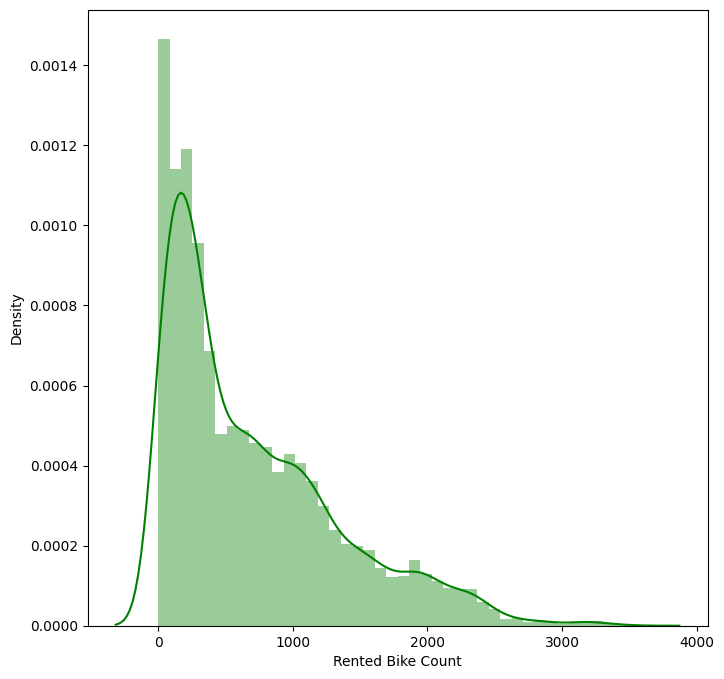

In [10]:
# Dependent Variable appliances
plt.figure(figsize=(8,8))
sns.distplot(dataset['Rented Bike Count'],color="g")

<Axes: xlabel='Snowfall (cm)', ylabel='Density'>

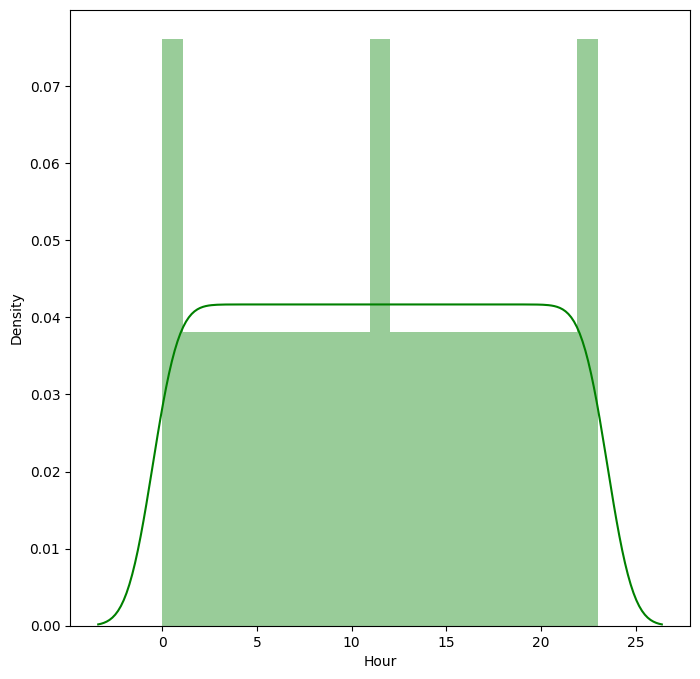

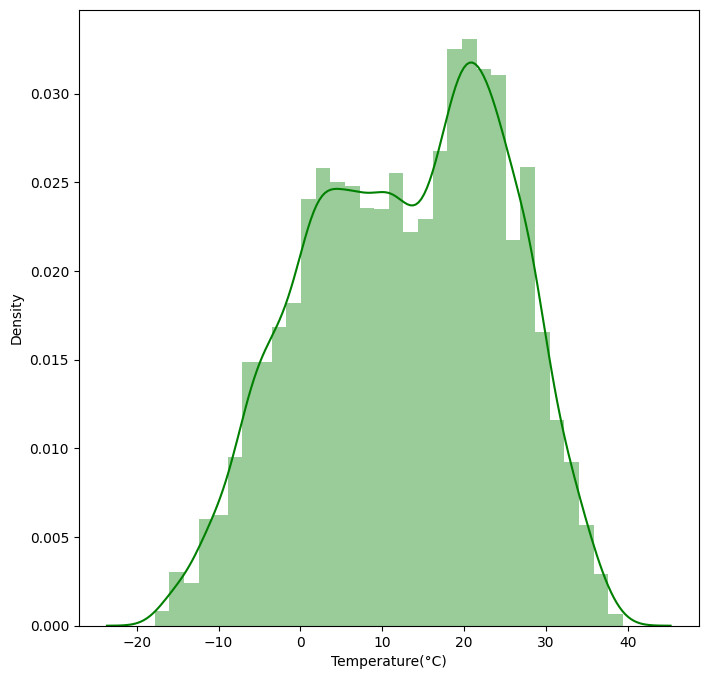

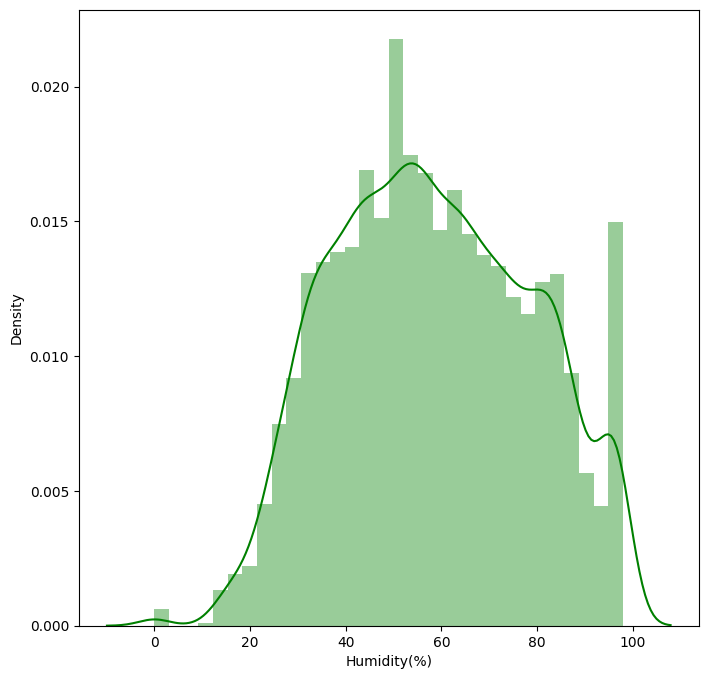

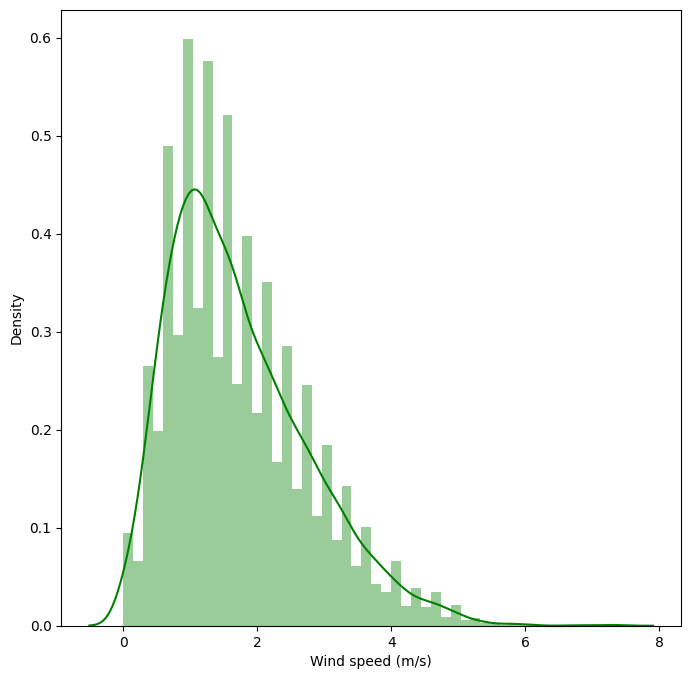

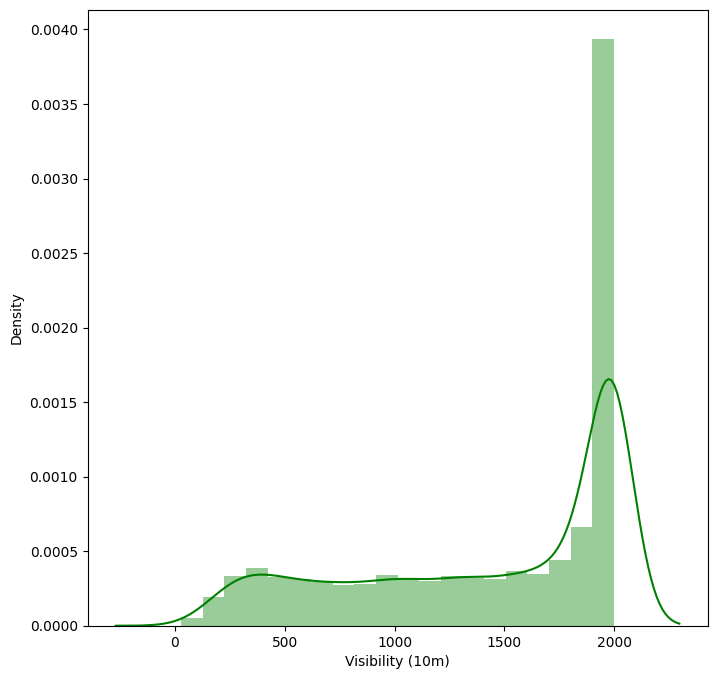

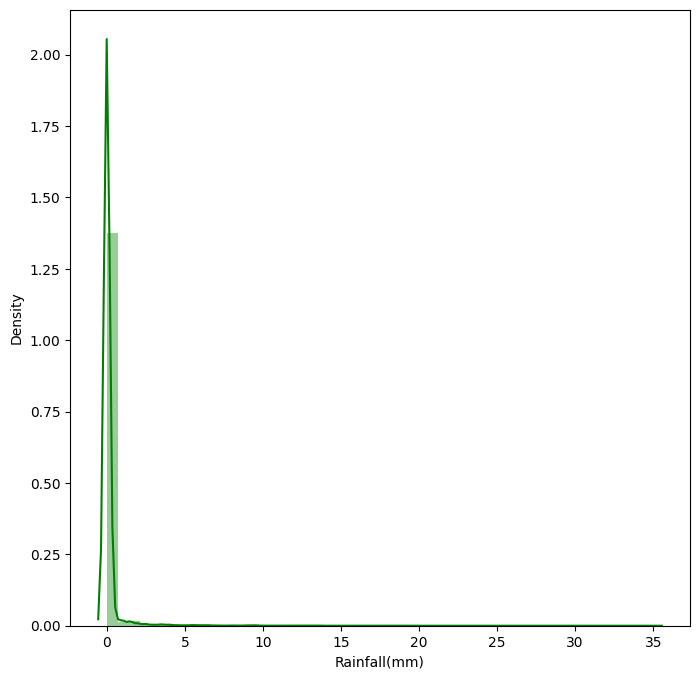

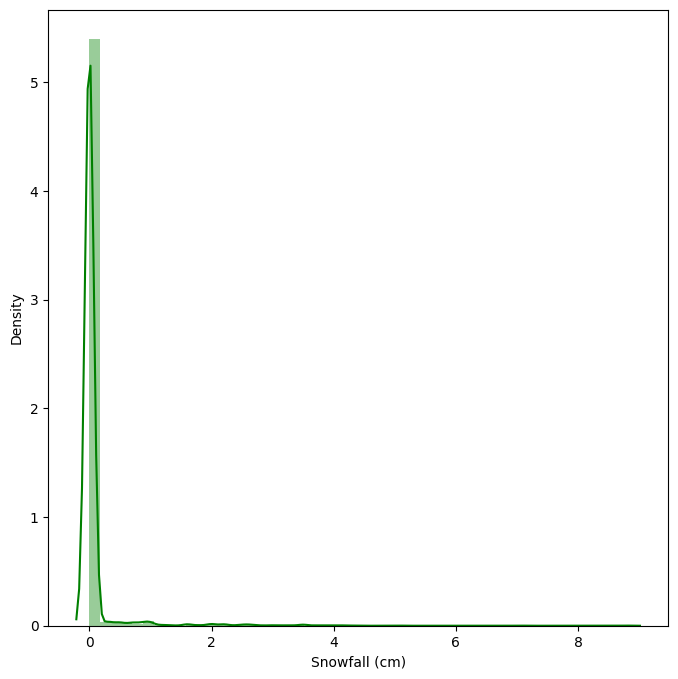

In [11]:
plt.figure(figsize=(8,8))
sns.distplot(dataset['Hour'],color="g")

plt.figure(figsize=(8,8))
sns.distplot(dataset['Temperature(°C)'],color="g")

plt.figure(figsize=(8,8))
sns.distplot(dataset['Humidity(%)'],color="g")

plt.figure(figsize=(8,8))
sns.distplot(dataset['Wind speed (m/s)'],color="g")

plt.figure(figsize=(8,8))
sns.distplot(dataset['Visibility (10m)'],color="g")

plt.figure(figsize=(8,8))
sns.distplot(dataset['Dew point temperature(°C)'],color="g")

plt.figure(figsize=(8,8))
sns.distplot(dataset['Solar Radiation (MJ/m2)'],color="g")

plt.figure(figsize=(8,8))
sns.distplot(dataset['Rainfall(mm)'],color="g")

plt.figure(figsize=(8,8))
sns.distplot(dataset['Snowfall (cm)'],color="g")

In [12]:
categorical_features= ['Seasons', 'Holiday', 'Functioning Day']
categorical_features

['Seasons', 'Holiday', 'Functioning Day']

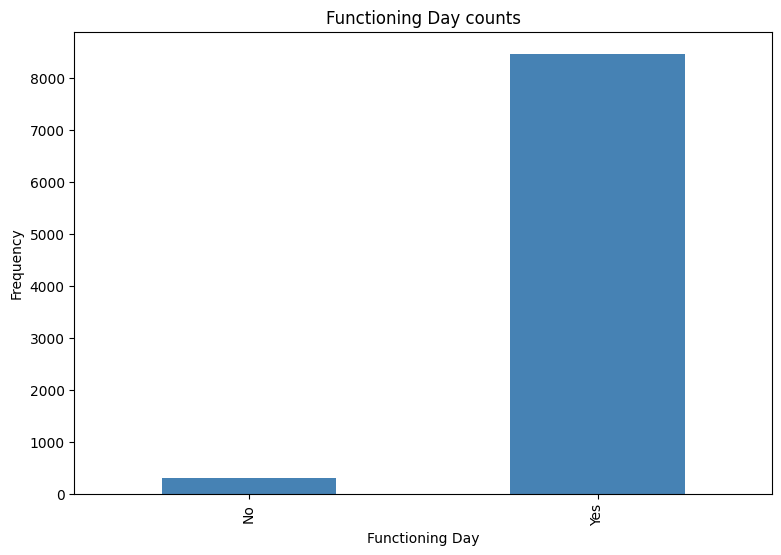

In [13]:
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

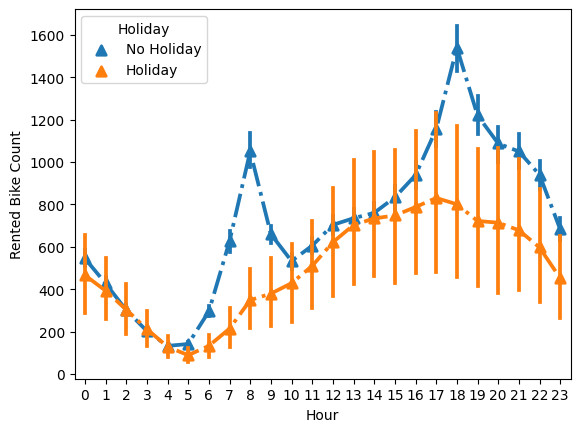

In [14]:
sns.pointplot(x = "Hour",
              y = "Rented Bike Count",
              linestyles = '-.',
              markers = '^',
              hue = "Holiday",
              data = dataset)
plt.show()

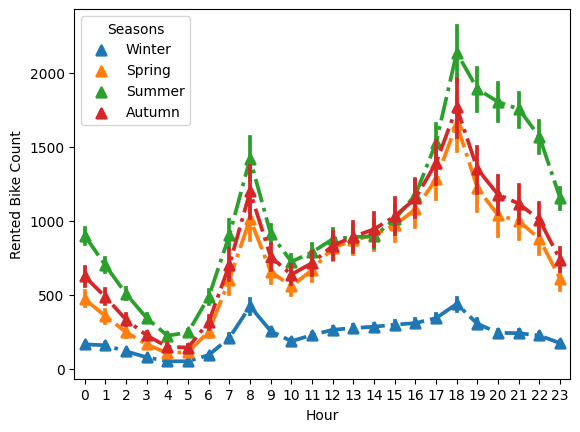

In [15]:
sns.pointplot(x = "Hour",
              y = "Rented Bike Count",
              linestyles = '-.',
              markers = '^',
              hue = "Seasons",
              data = dataset)
plt.show()

In [16]:
# Conversion of Date columns to Date format 

dataset['Date']= pd.to_datetime(dataset['Date'])

In [17]:
# extracting day,month, day of week and weekdays/weekend from date column

dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['month'] = dataset['Date'].apply(lambda x : x.month)
dataset['day_of_week'] = dataset['Date'].dt.day_name()
dataset['weekdays_weekend']=dataset['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
dataset=dataset.drop(columns=['Date','day_of_week'],axis=1)

In [18]:
#checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='PiYG',annot=True)

<Axes: >

In [19]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def pred_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [20]:
pred_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

variables       VIF
0                     Hour  3.961874
1          Temperature(°C)  3.236809
2              Humidity(%)  6.114153
3         Wind speed (m/s)  4.616621
4         Visibility (10m)  5.404128
5  Solar Radiation (MJ/m2)  2.272068
6             Rainfall(mm)  1.081252
7            Snowfall (cm)  1.125304
8                    month  4.580307
9         weekdays_weekend  1.399708

In [21]:
#visualising distribution
sns.distplot(dataset['Rented Bike Count'])

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

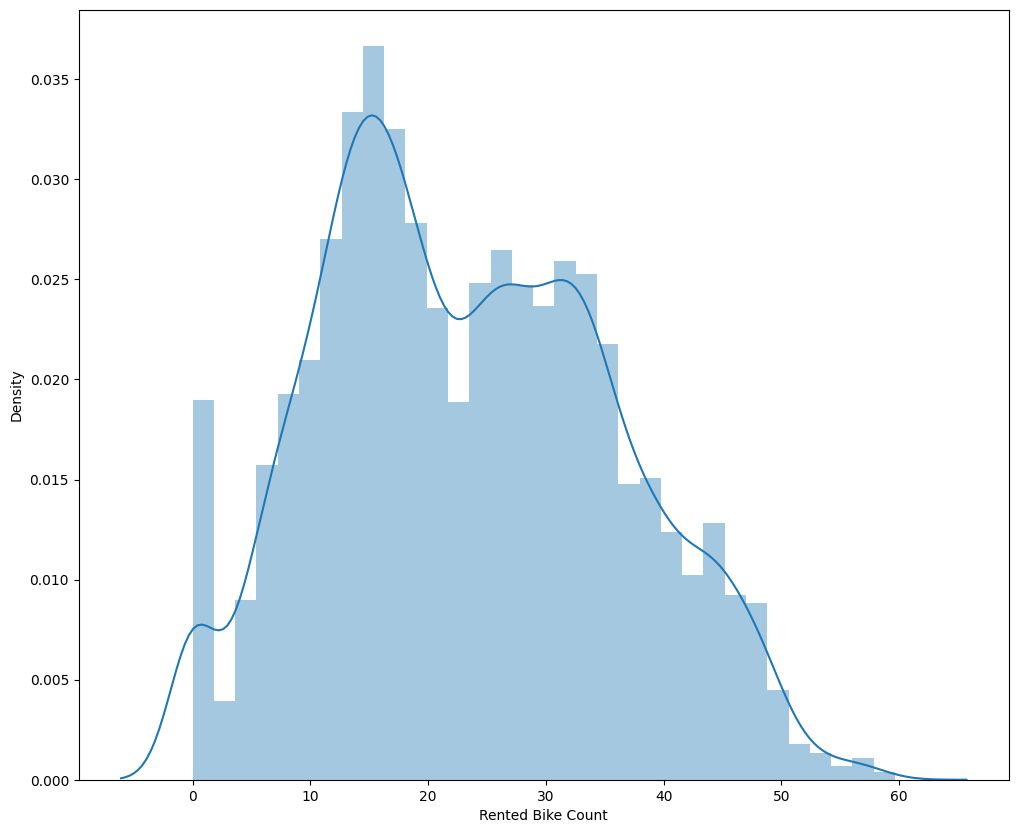

In [22]:
# square_root transformation
plt.figure(figsize=(12,10))
sns.distplot(np.sqrt(dataset['Rented Bike Count']))

In [23]:
# Numeric Features
numeric_features= dataset.select_dtypes(exclude='object')

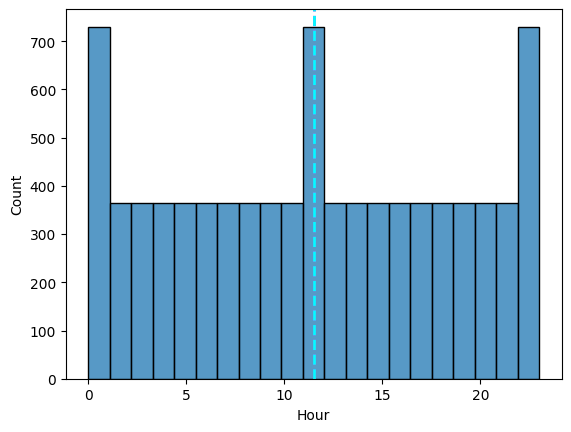

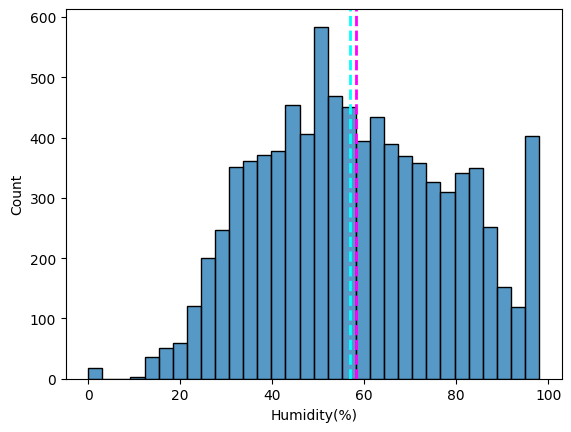

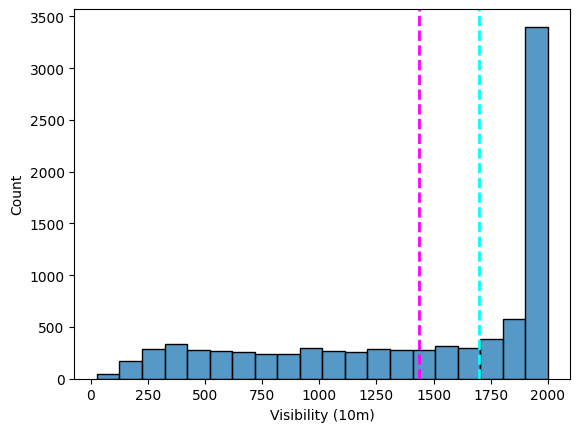

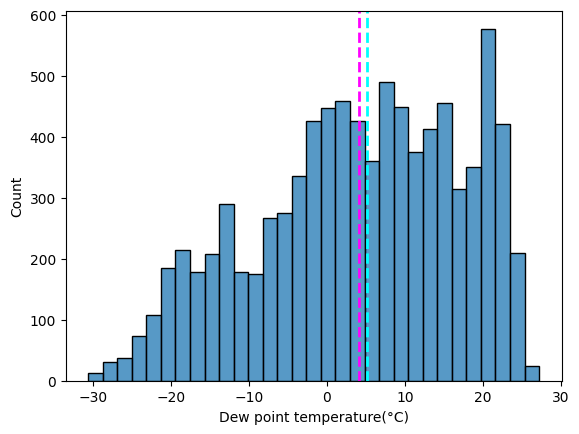

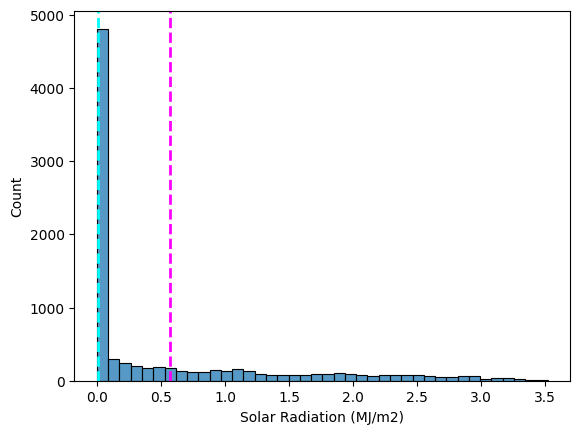

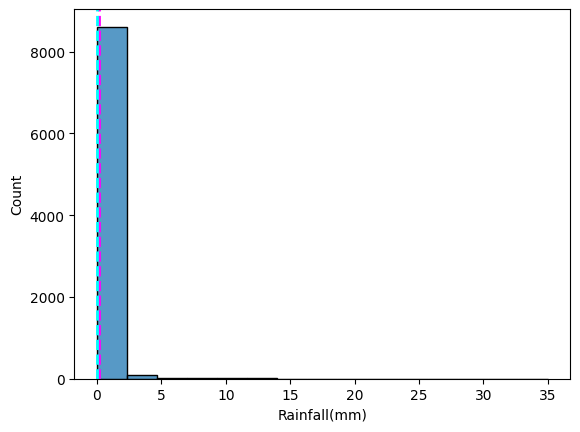

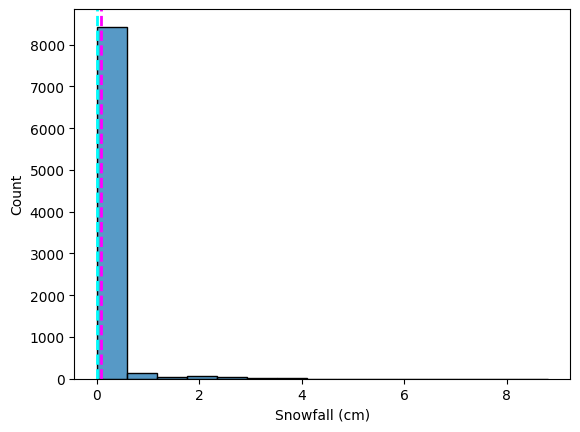

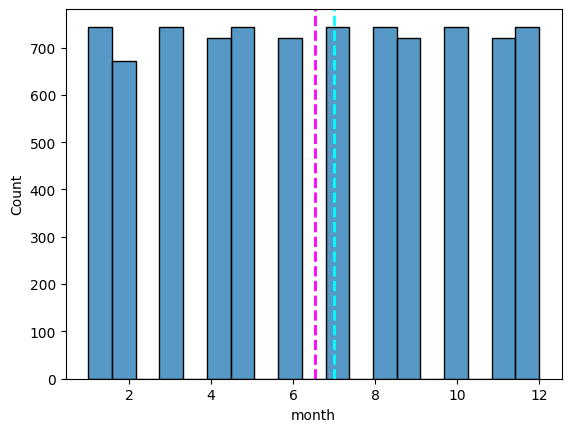

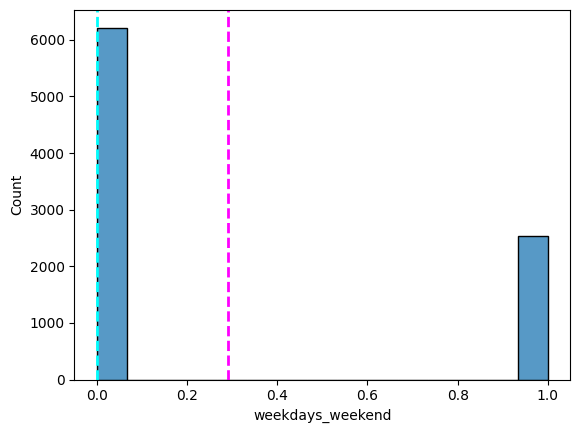

In [24]:
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(dataset[col])
  plt.axvline(dataset[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(dataset[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

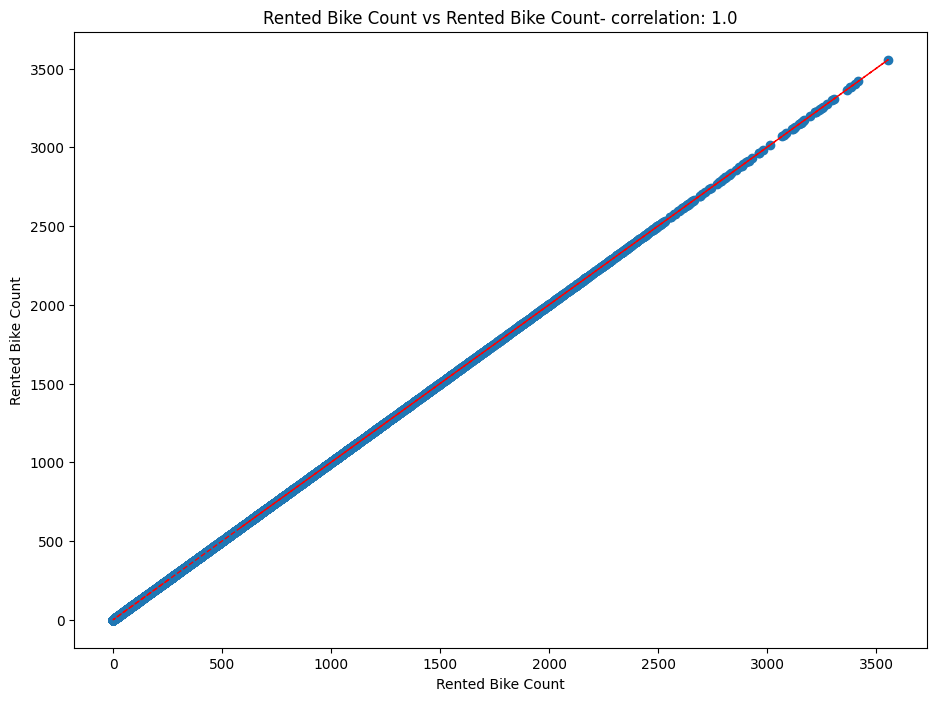

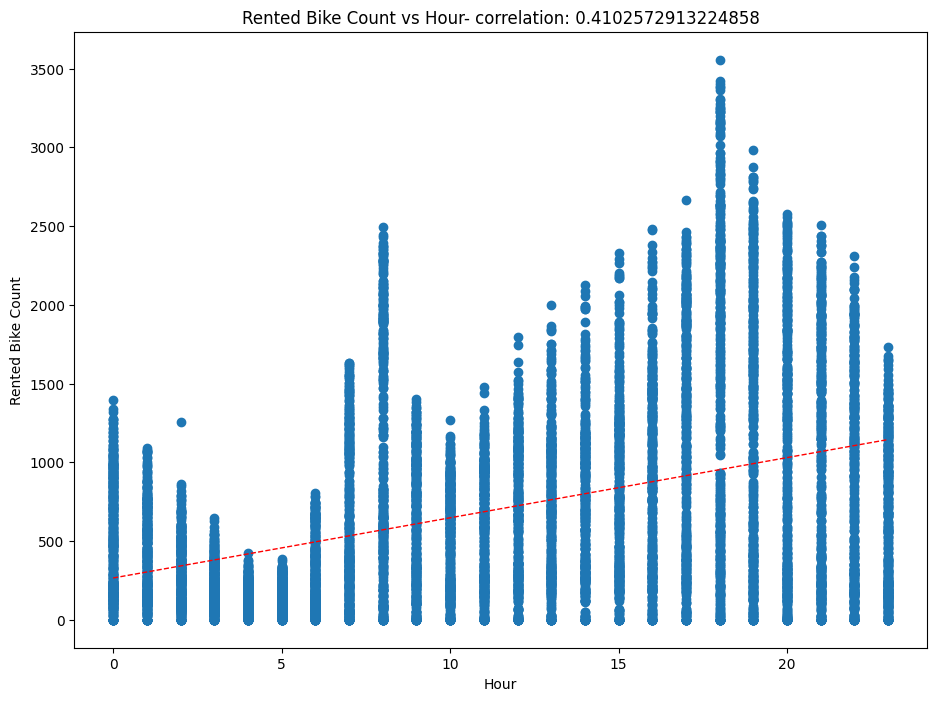

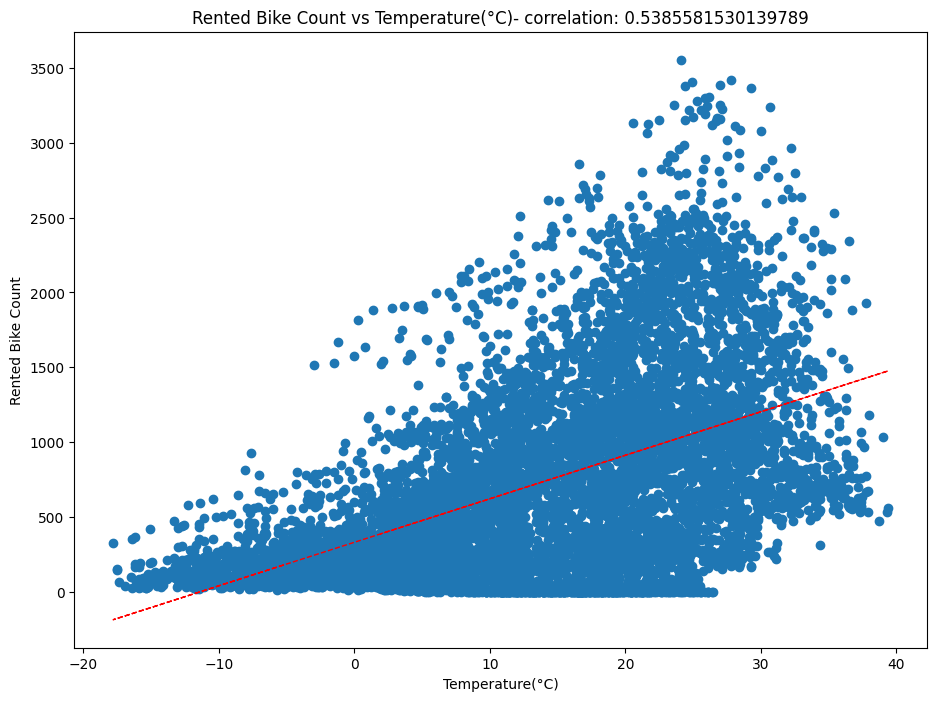

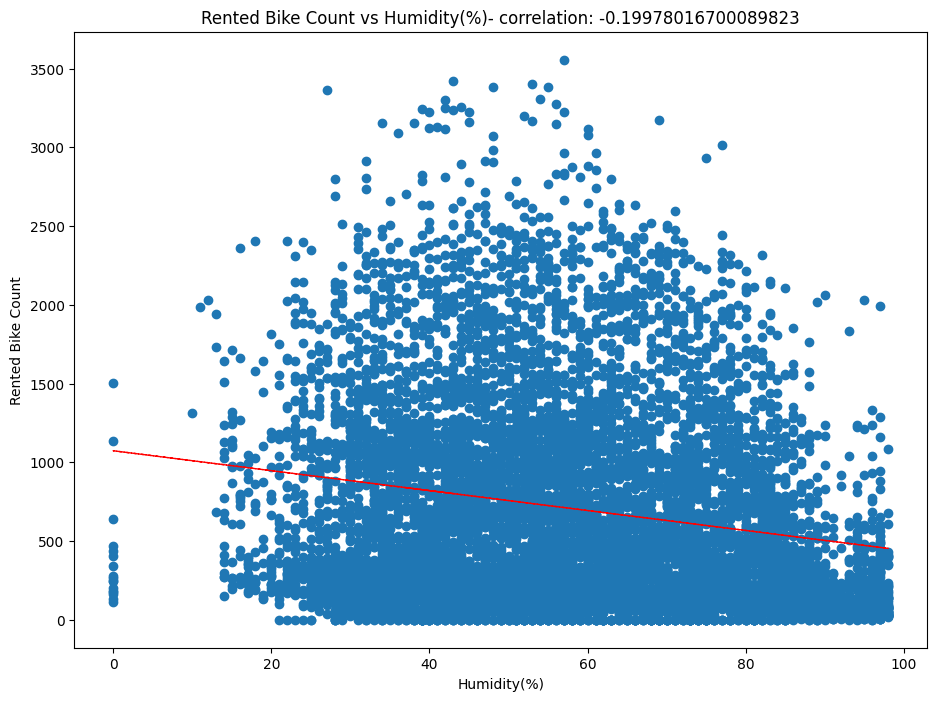

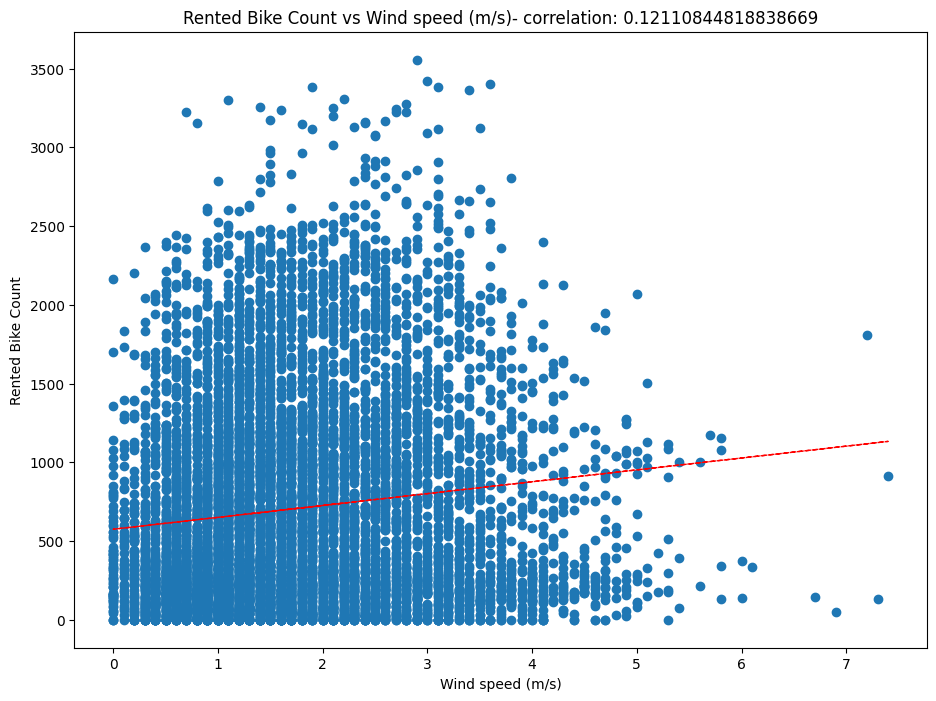

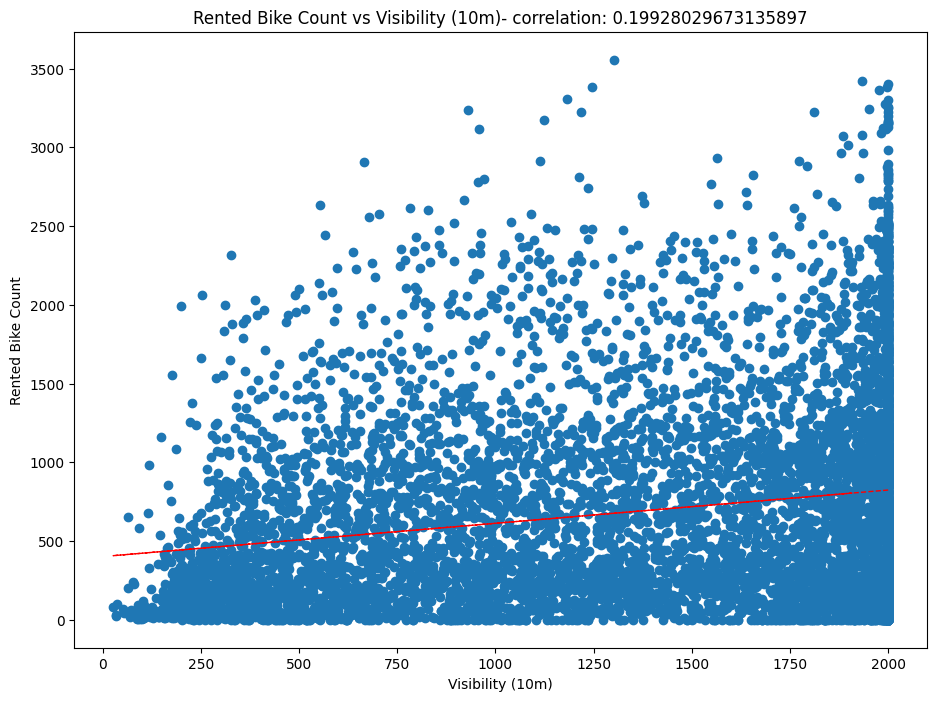

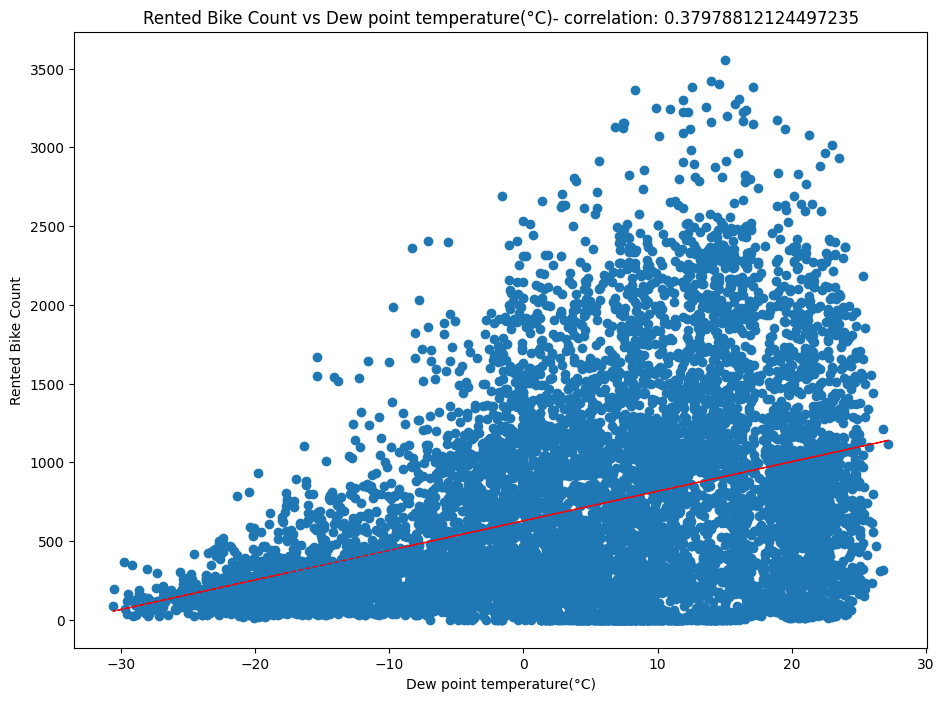

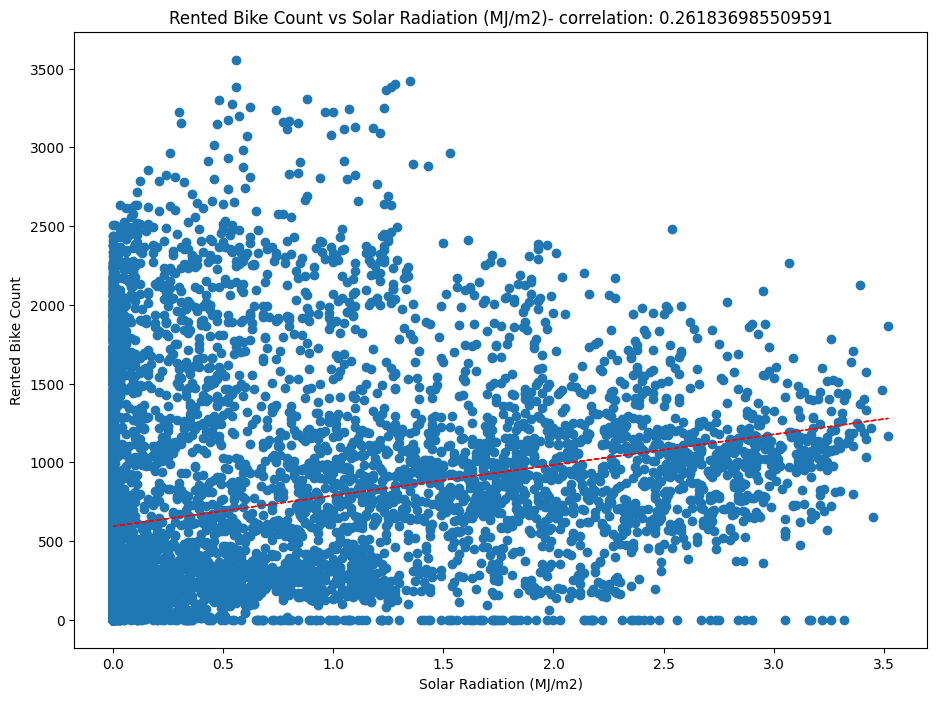

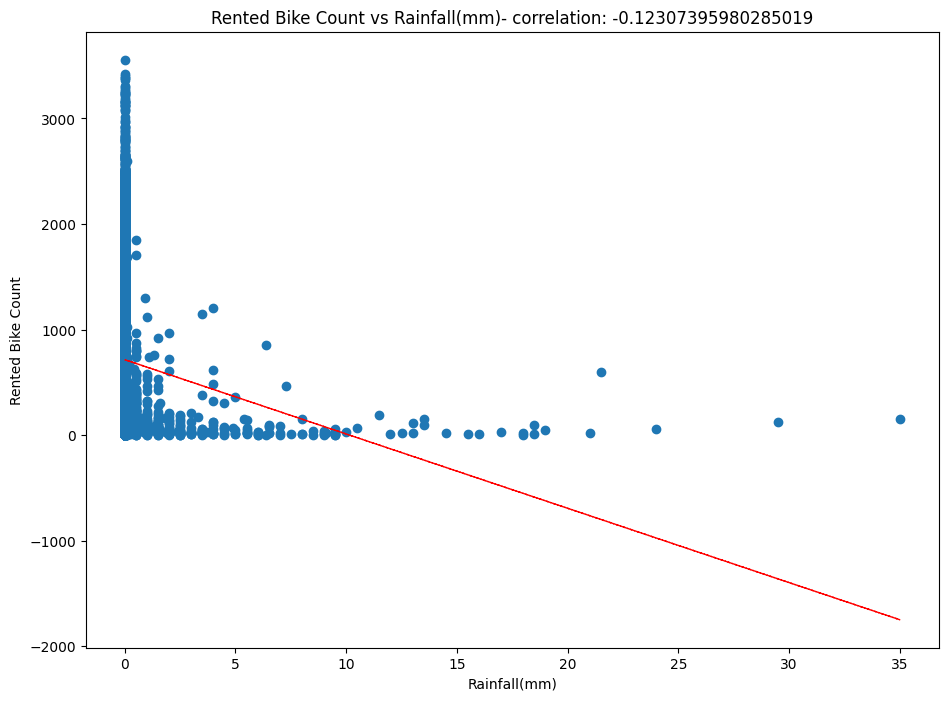

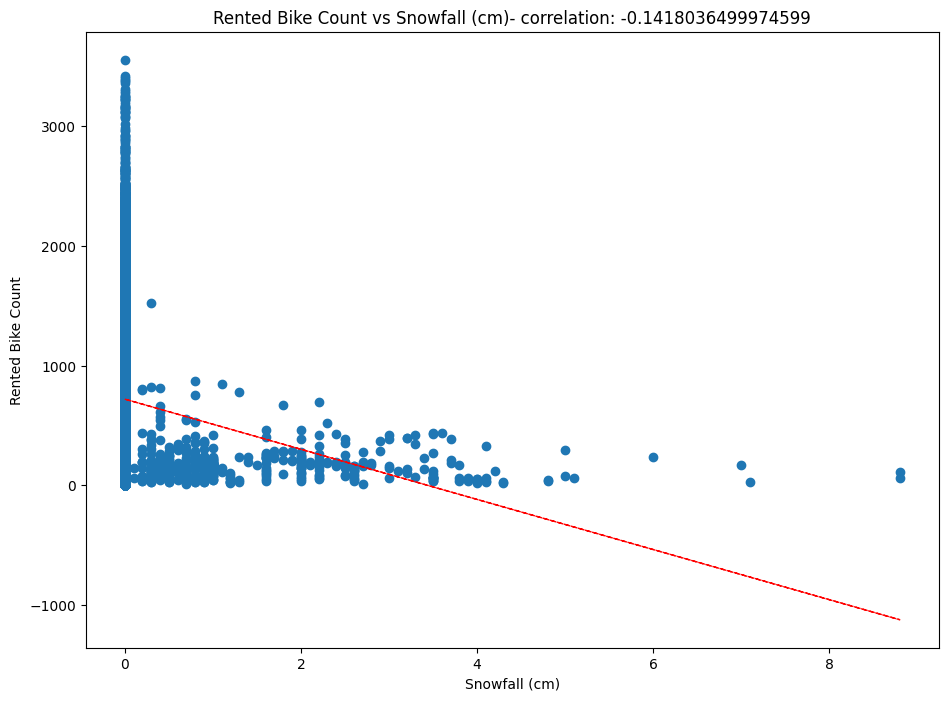

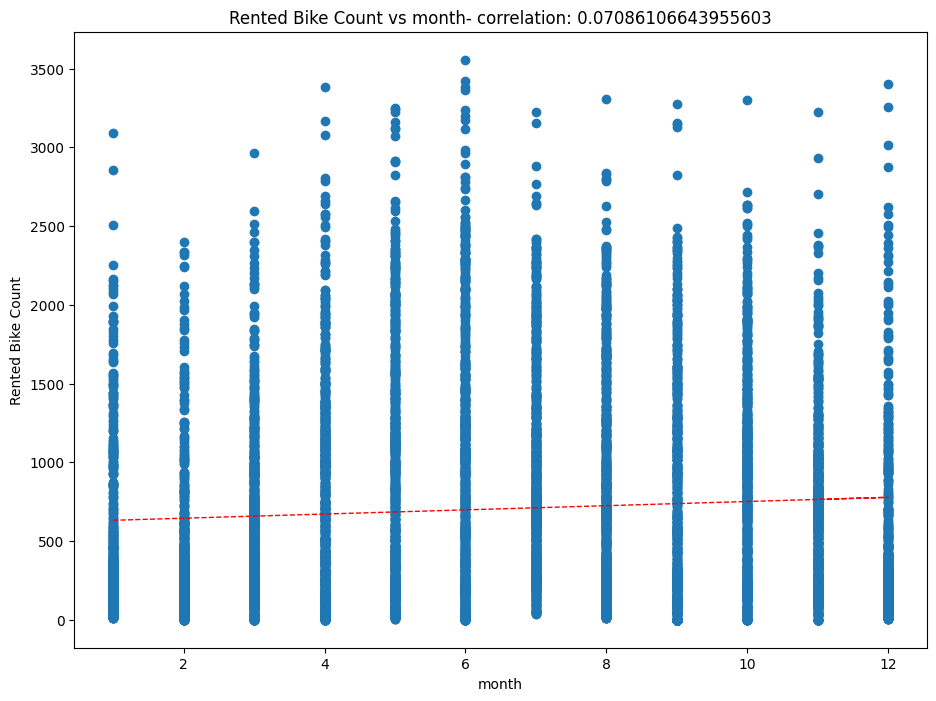

In [27]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(11, 8))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

In [26]:
#Extracting categorical features
categorical_features= dataset.select_dtypes(include='object')

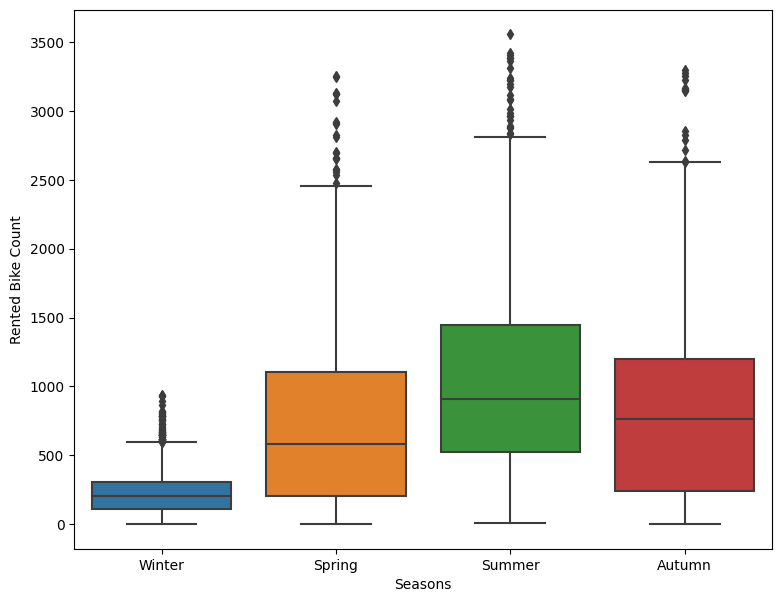

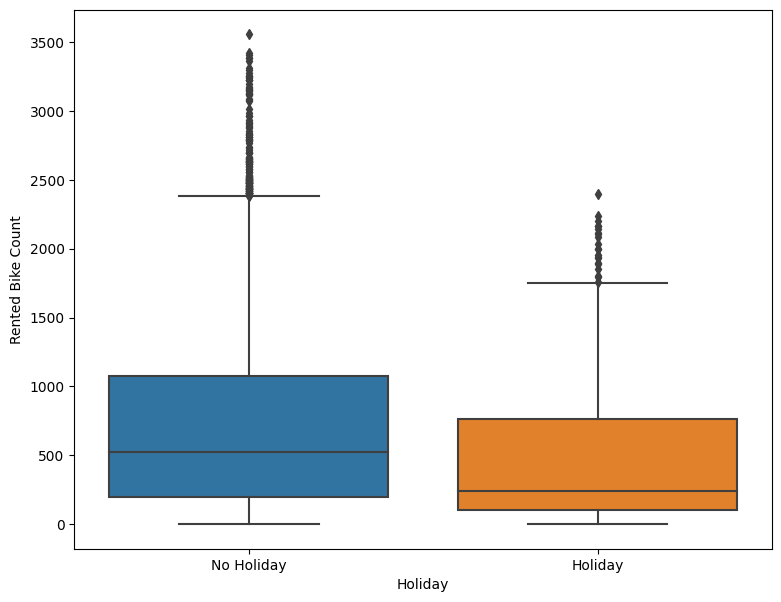

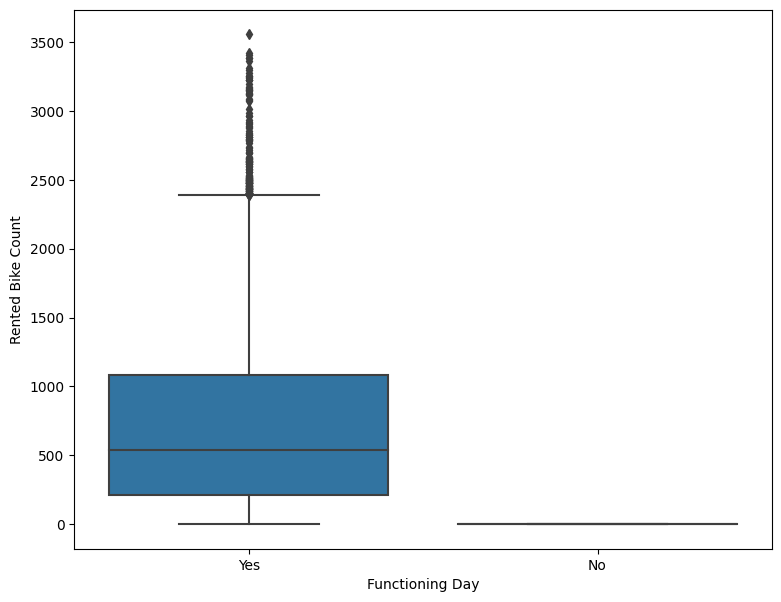

In [29]:
for col in categorical_features:
  plt.figure(figsize=(9,7))
  sns.boxplot(x=dataset[col],y=dataset["Rented Bike Count"])
  plt.show()
  ##Plotting a box plot and trying to get information out from it.

In [30]:
dataset['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [31]:
#ploting cat plot for more info
sns.catplot(x='Seasons',y='Rented Bike Count',data=dataset)

In [35]:
#ploting line graph
# group by hours and obtain an average bike rental and percentage of payment
avg_rent_hrs = dataset.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(22,8))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

In [36]:
#Dummy variable creation for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)
dummy_categorical_feature

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [37]:
#combining fake columns with numerical columns to create the final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)
final_df

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  \
0                       1                254     0             -5.2   
1                       1                204     1             -5.5   
2                       1                173     2             -6.0   
3                       1                107     3             -6.2   
4                       1                 78     4             -6.0   
...                   ...                ...   ...              ...   
8755                    1               1003    19              4.2   
8756                    1                764    20              3.4   
8757                    1                694    21              2.6   
8758                    1                712    22              2.1   
8759                    1                584    23              1.9   

      Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0              37               2.2              2000   
1              38               0.8              2000   
2              39               1.0              2000   
3              40               0.9              2000   
4              36               2.3              2000   
...           ...               ...               ...   
8755           34               2.6              1894   
8756           37               2.3              2000   
8757           39               0.3              1968   
8758           41               1.0              1859   
8759           43               1.3              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                         -17.6                      0.0           0.0   
1                         -17.6                      0.0           0.0   
2                         -17.7                      0.0           0.0   
3                         -17.6                      0.0           0.0   
4                         -18.6                      0.0           0.0   
...                         ...                      ...           ...   
8755                      -10.3                      0.0           0.0   
8756                       -9.9                      0.0           0.0   
8757                       -9.9                      0.0           0.0   
8758                       -9.8                      0.0           0.0   
8759                       -9.3                      0.0           0.0   

      Snowfall (cm)  month  weekdays_weekend  
0               0.0      1                 0  
1               0.0      1                 0  
2               0.0      1                 0  
3               0.0      1                 0  
4               0.0      1                 0  
...             ...    ...               ...  
8755            0.0     11                 0  
8756            0.0     11                 0  
8757            0.0     11                 0  
8758            0.0     11                 0  
8759            0.0     11                 0  

[8760 rows x 17 columns]

<Figure size 1800x1400 with 0 Axes>

<Figure size 1800x1400 with 0 Axes>

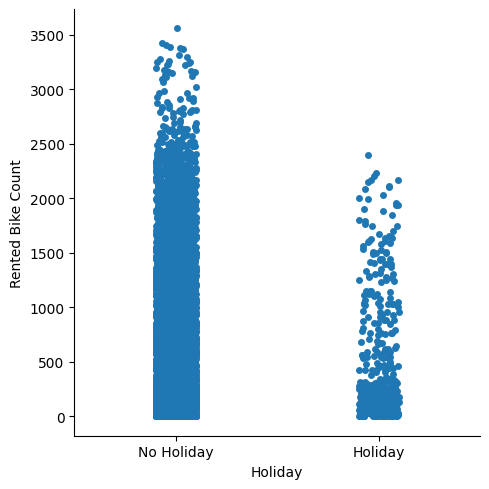

<Figure size 1800x1400 with 0 Axes>

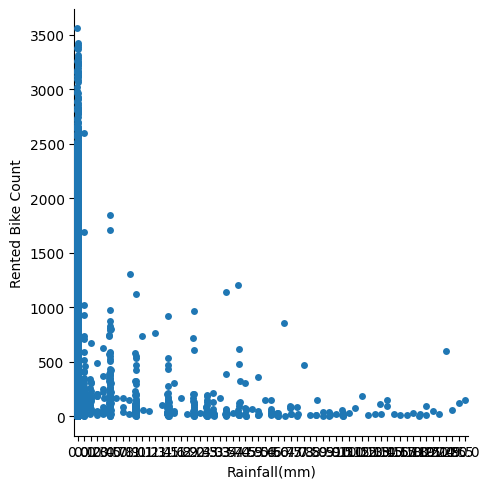

<Figure size 1800x1400 with 0 Axes>

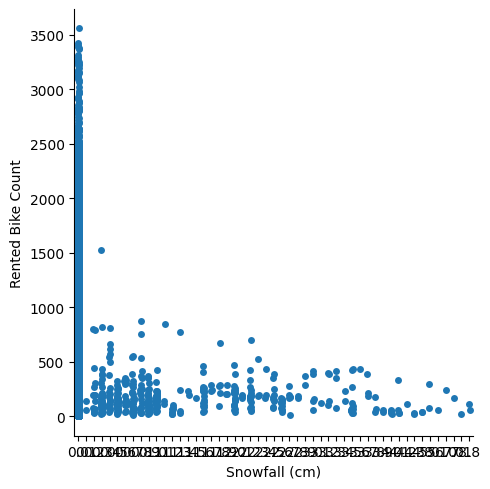

<Figure size 1800x1400 with 0 Axes>

In [39]:
# ploting catplot on some feature to get more information
feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(9,7),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=dataset)
  plt.show()

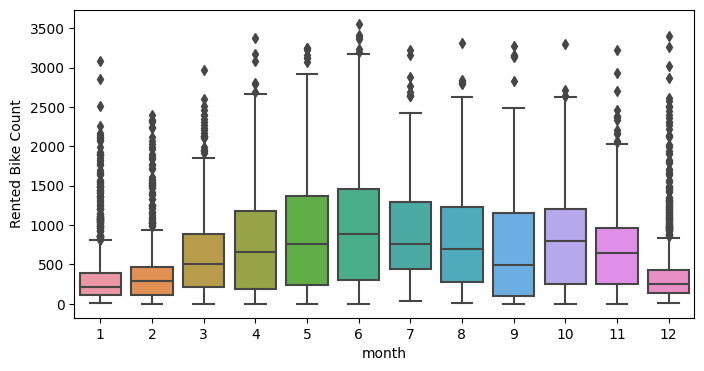

In [40]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=dataset)
plt.show()

In [42]:
#putting together a collection of matrices to hold the evaluation matrices for all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [43]:
# making a function to train and evaluate linear model
def linear_train_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  #appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(24,14))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()


In [44]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=75b19d7a840f2f8ae743f22ff62ba4b78f44d45ac6d0266adda28c0a757934de
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [45]:
def main_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
  #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(24,14))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [46]:
def find_features_imp (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

In [47]:
# LIME SECTION
import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')
  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

In [48]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [49]:
y=np.sqrt(final_df['Rented Bike Count'])

In [53]:
#spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=1)

In [54]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## **Linear Regression**


================Evalution Matrix=========================

MSE : 175563.2918504488
RMSE : 419.00273489614455
R2 : 0.5772468422711328
Adjusted R2 :  0.5758379585961355

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



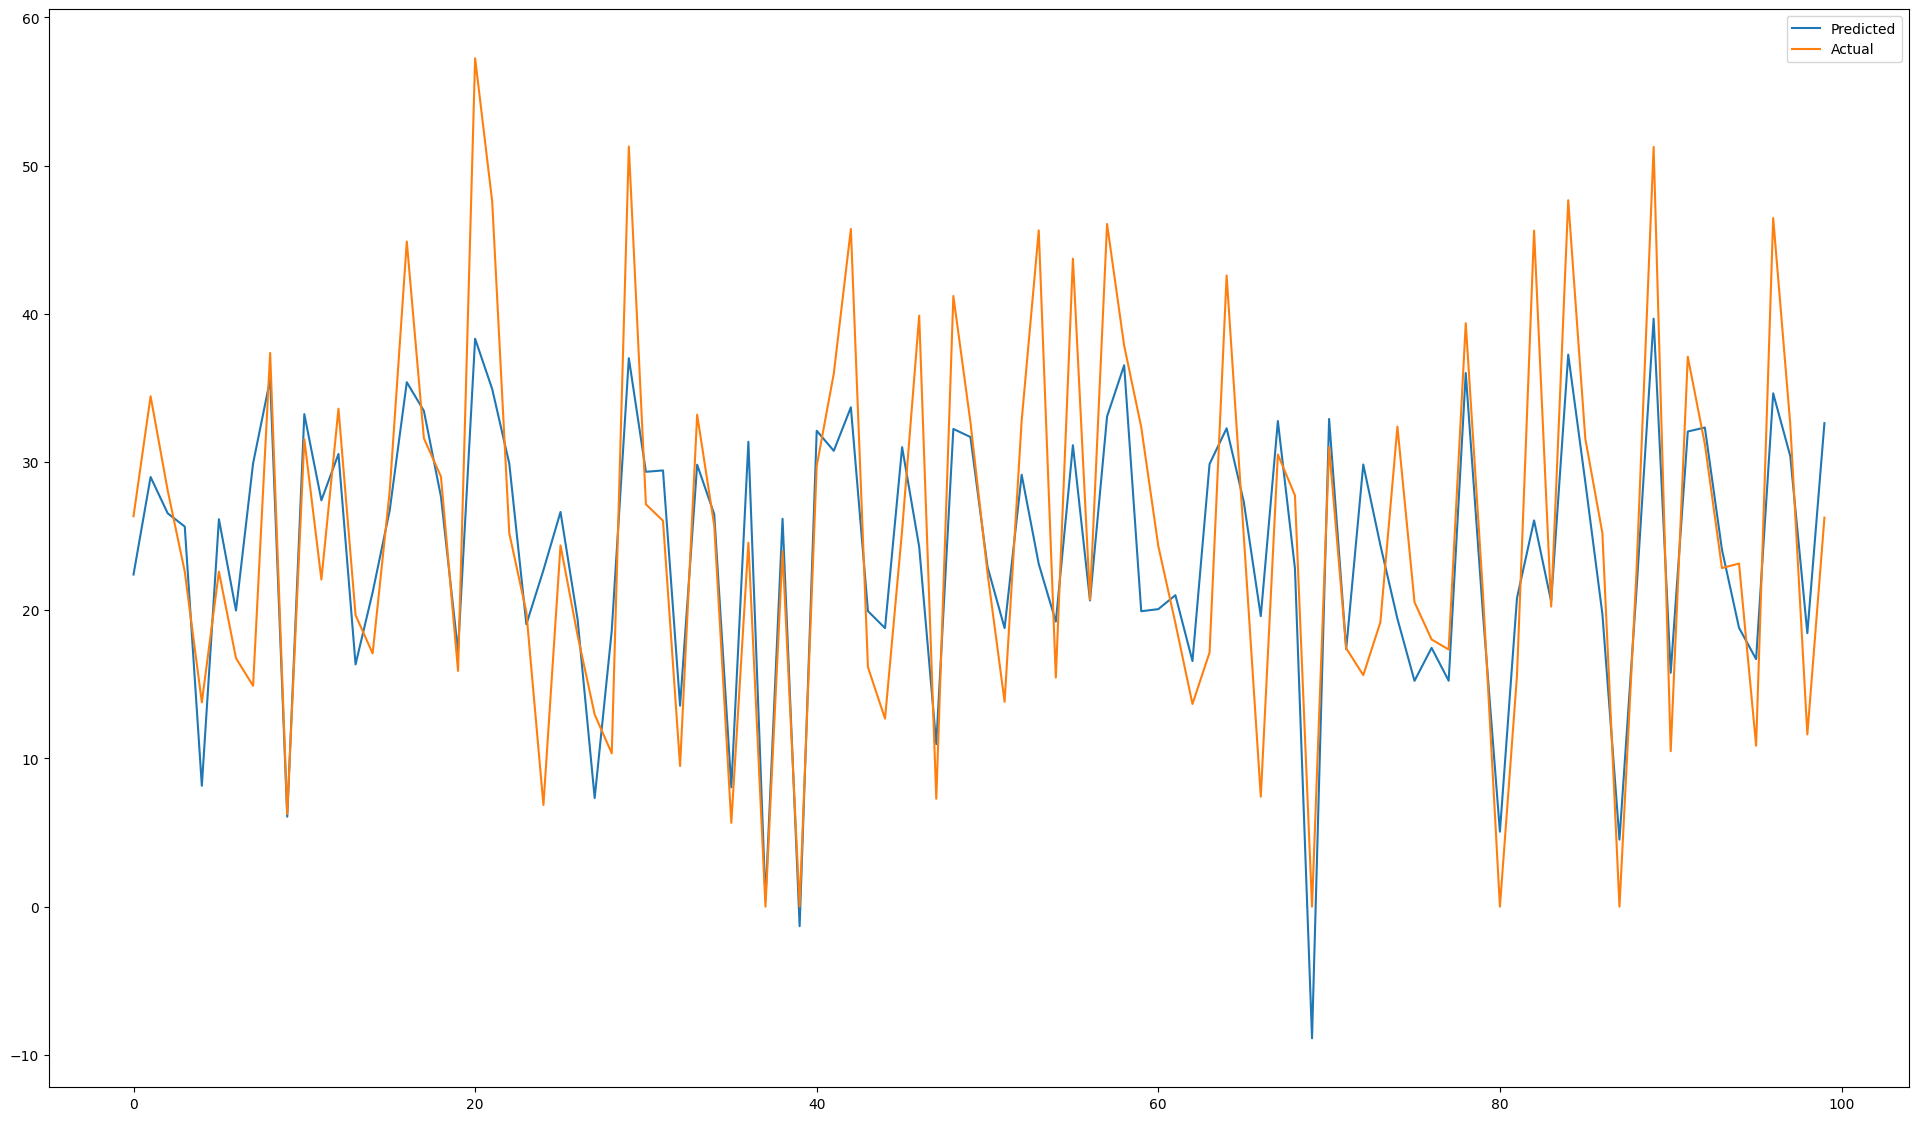

In [56]:
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression()
linear_train_model(linear_model, X_train, y_train, X_test, y_test)

## **Lasso Regression**

In [57]:
from sklearn.linear_model import Lasso
# finding the best parameters for lasso by grid search cv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,55,60,80,100,0.0018]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 175223.1096418424
RMSE : 418.596595353859
R2 : 0.5780659947339042
Adjusted R2 :  0.5766598409983787

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



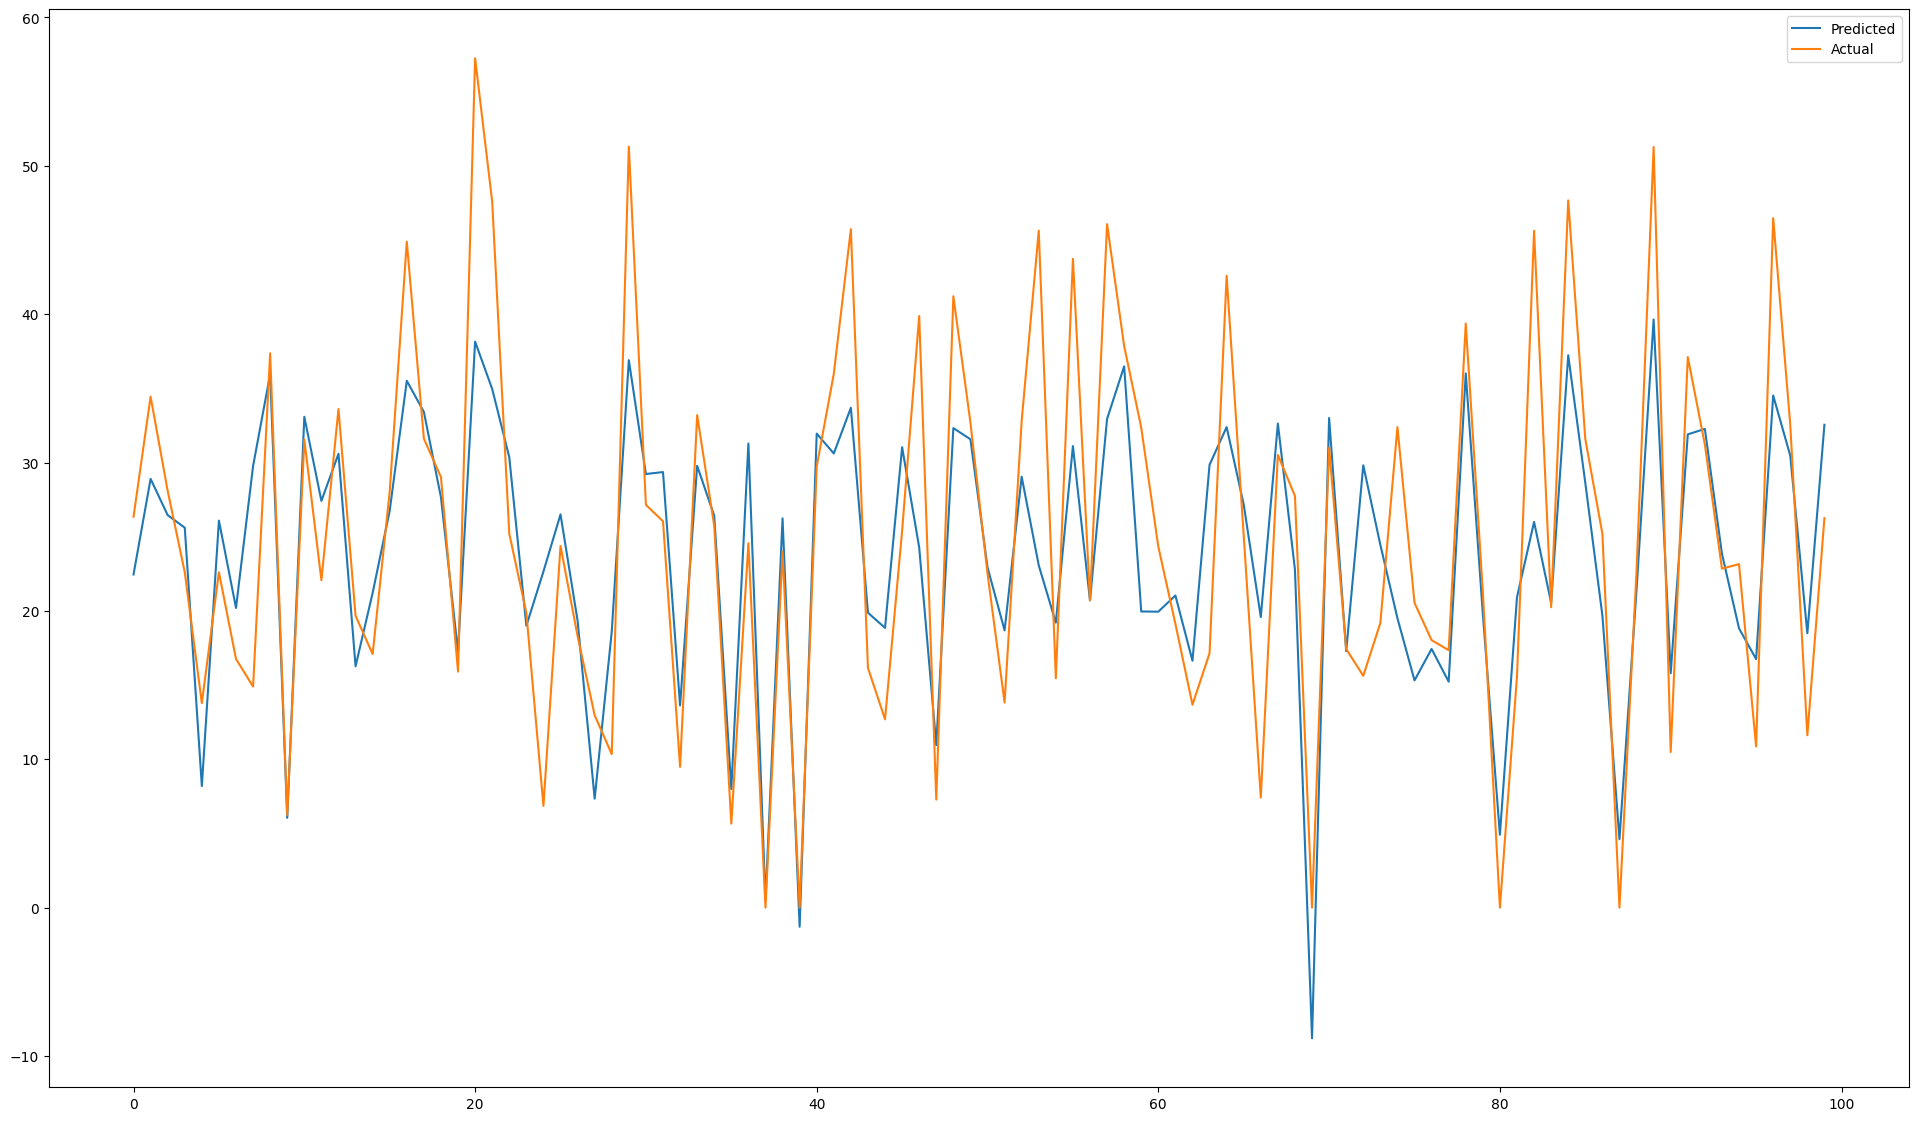

In [59]:
# calling train_linear_model to train,fit and evalution of lasso model
linear_train_model(lasso_grid,X_train,y_train,X_test,y_test)

## **Ridge Regression**

In [60]:
from sklearn.linear_model import Ridge
ridge = Ridge()
# finding the best parameters for ridge model by grid search cv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,55,60,80,100,0.5,1.5,1.6,1.7,1.8,1.90]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 174974.0571739803
RMSE : 418.29900450990834
R2 : 0.5786657084674478
Adjusted R2 :  0.5772615533613197

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



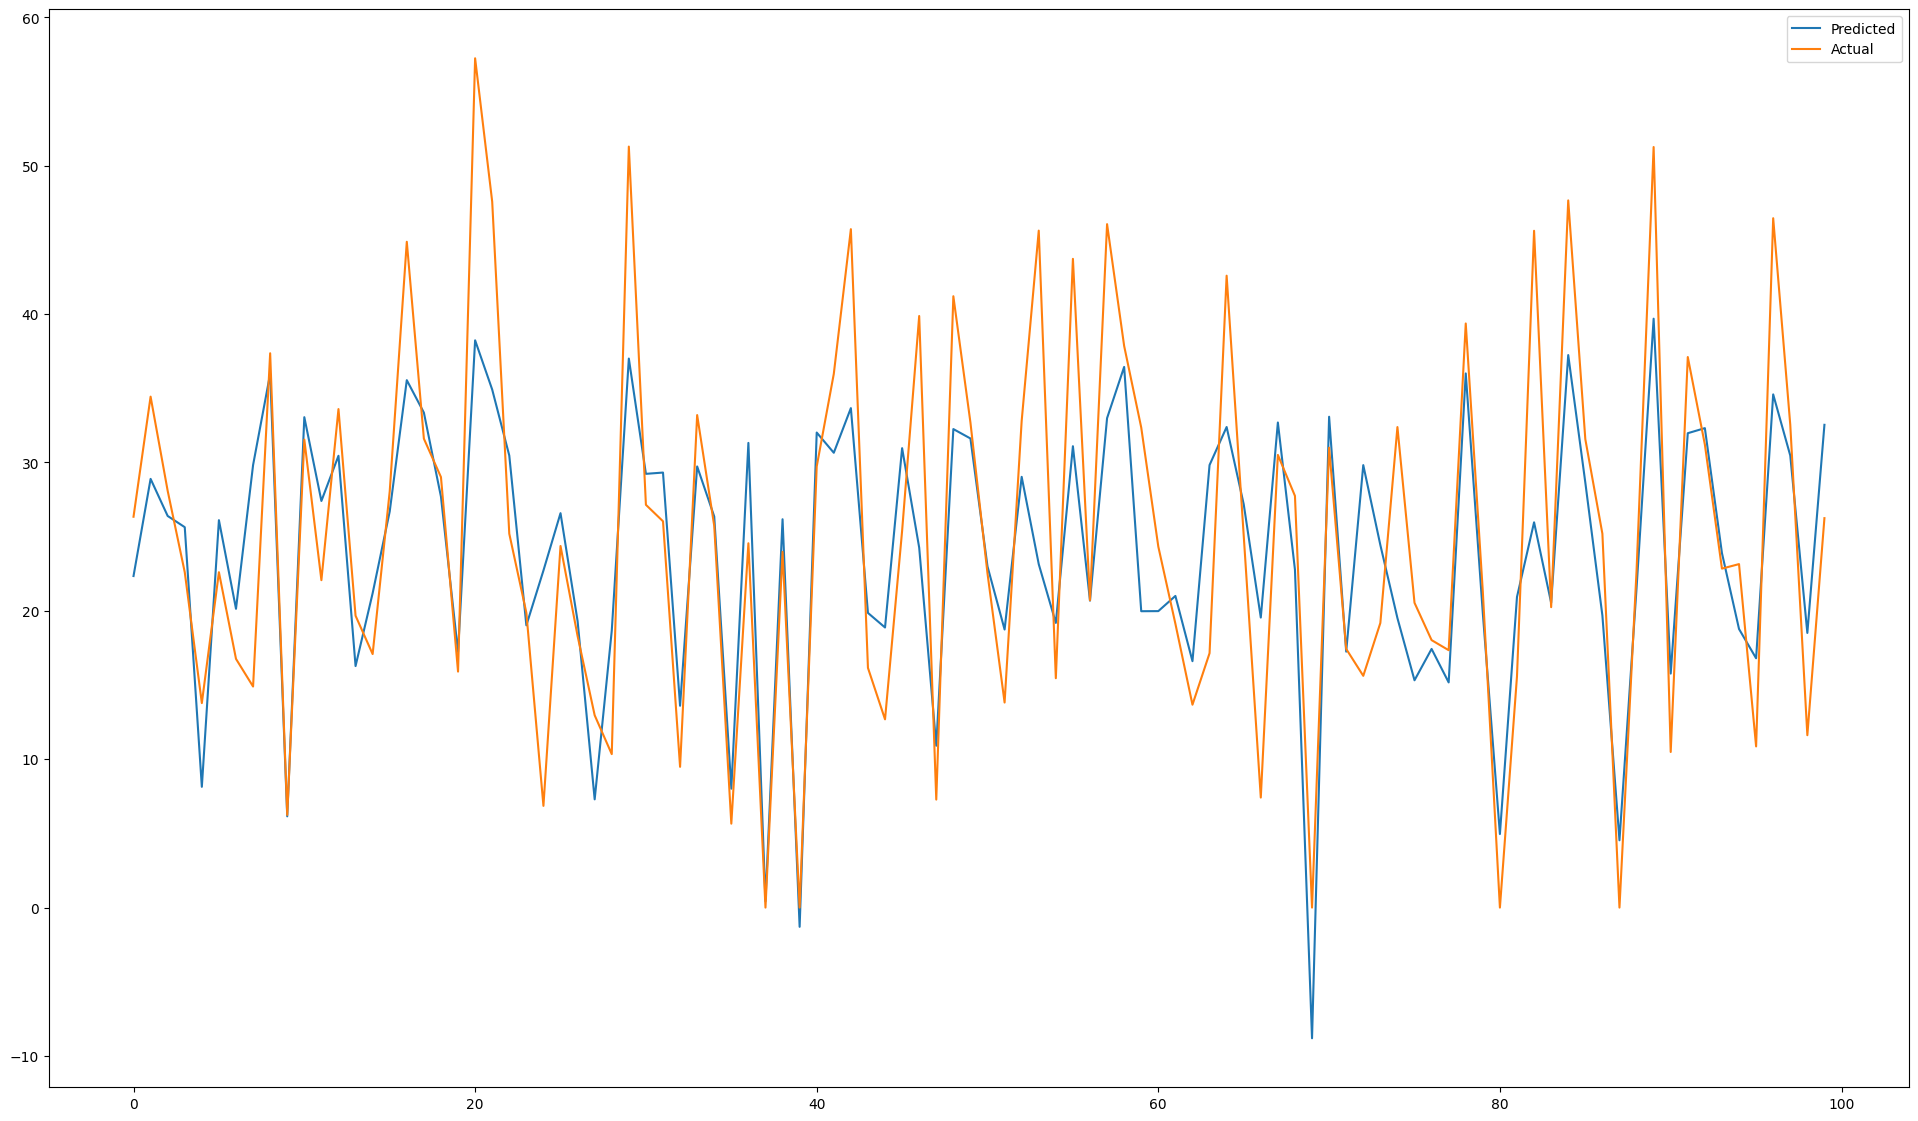

In [61]:
# calling train_linear_model to train,fit and evalution of ridge model
linear_train_model(ridge_grid,X_train,y_train,X_test,y_test)

## **Random Forest**

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
##Here we are creating model of Random forest
rf_model = RandomForestRegressor()

In [64]:
#constructing a param dict to use gridsearch to check random forests with various parameter values
n_estimators=[60,80,100]
max_depth=[20,25]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [65]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 18.186150990197593
RMSE : 4.264522363664844
R2 : 0.8824516631592138
Adjusted R2 :  0.882059916983531

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



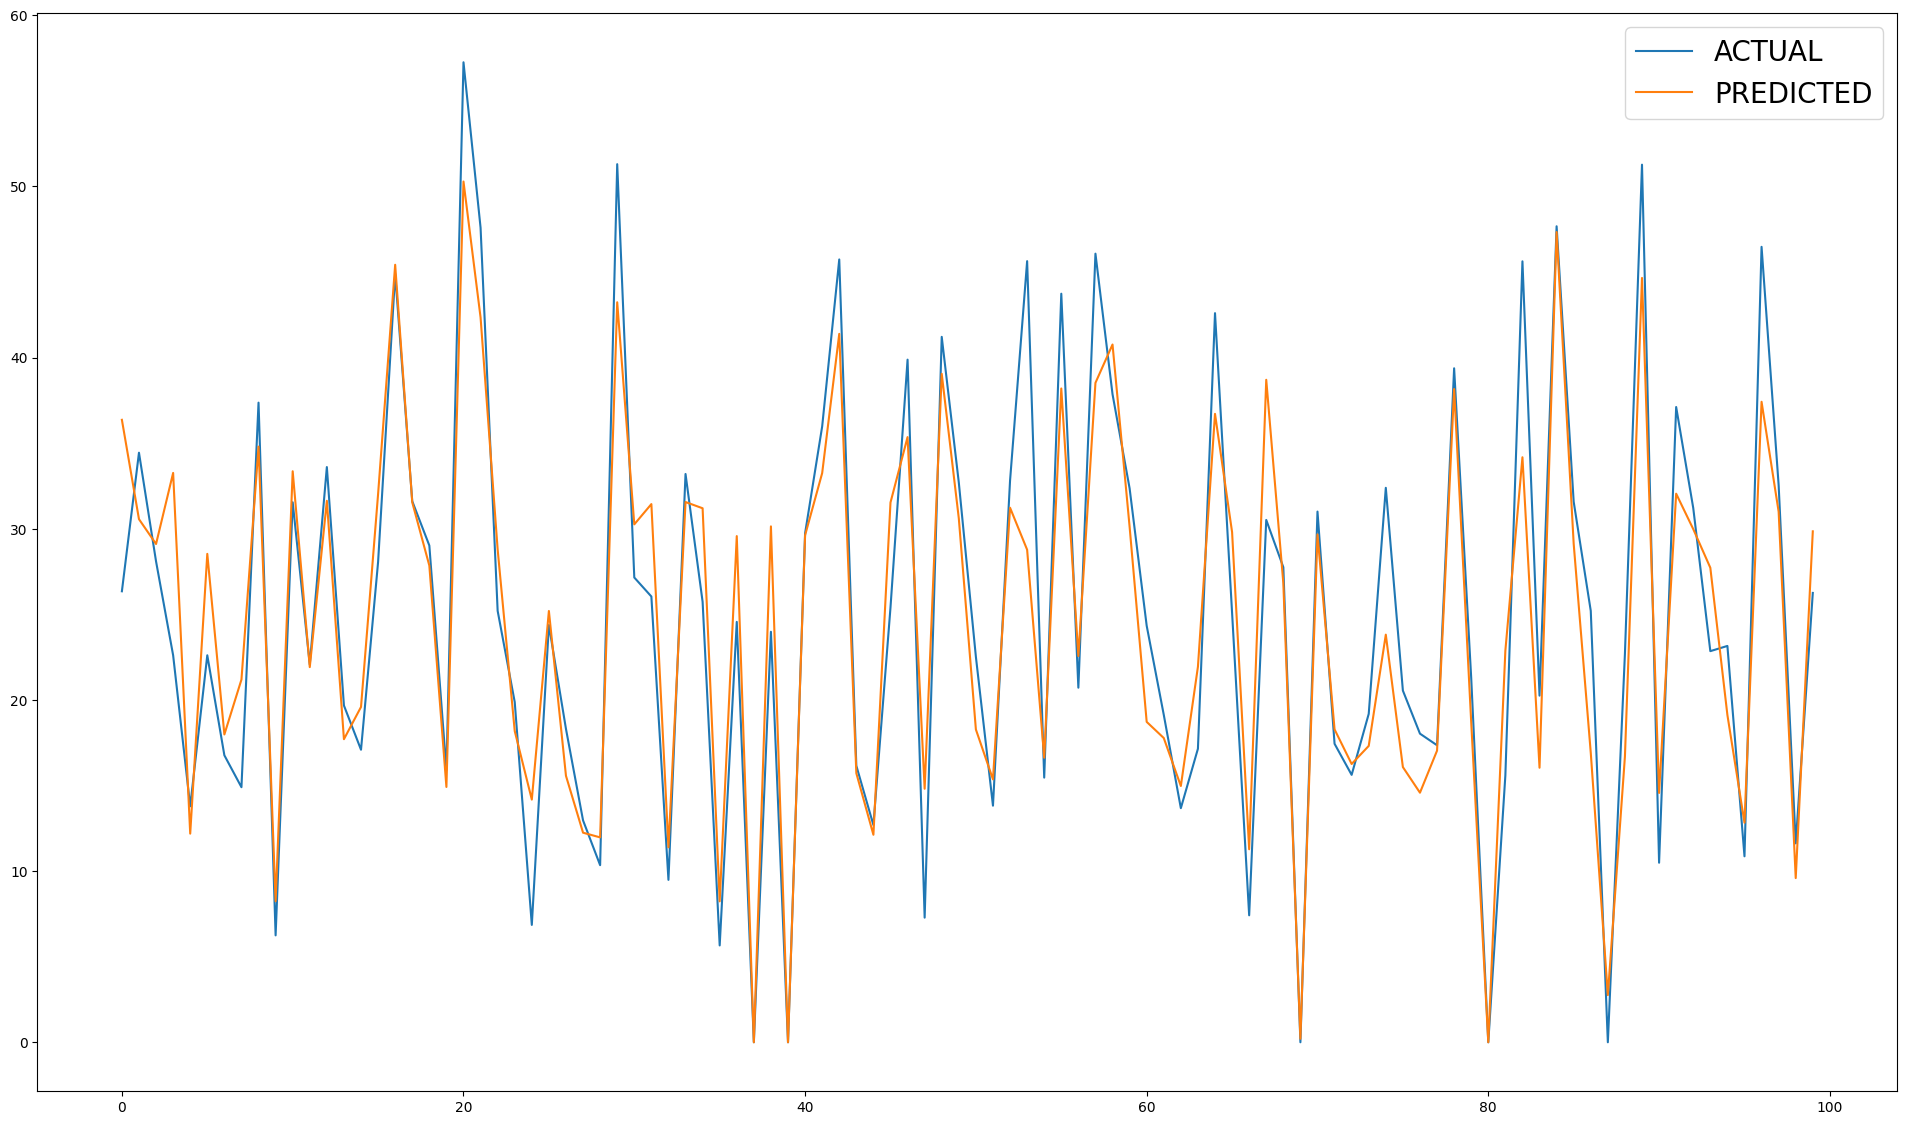

In [69]:
#calling main_model to train,fit and evalution of decision tree model
main_model(rf_grid,X_train,y_train,X_test,y_test)

## **Conclusion**

To forecast the quantity of rented bikes under specific weather circumstances, we train a model.Exploratory data analysis is first subjected on the dataset. Looking for null values that are absent from the dataset and outliers, and we alter them appropriately. Additionally, we carry out correlation analysis to separate the crucial and pertinent feature set, after which we carry out feature engineering.


*  Season: We see the most bike rentals during the summer and the least during the spring.

*  Weather: On clear days,we are observing the most bike rentals while it is least on snowy or rainy days.

*  Humidity: When humidity rises,then we are observing a drop in the number of bike rentals.

 When individuals go for work at 8 AM and return home at 6 PM, there is a high   demand for bikes.

 Please prefer more bikes in the morning

 As we reach an r-squared of 87%, random forest will function optimally.




